In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [2]:
iris_data=load_iris()   # loading iris dataset from sklearn.datasets
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)

# famous dataset that gives some features about three types of flowers
# resource: https://www.analyticsvidhya.com/blog/2021/06/analyzing-decision-tree-and-k-means-clustering-using-iris-dataset/

In [3]:
# explore the data
# qusestion: can anyone see a target?

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# check the shape of the data

iris_df.shape

(150, 4)

In [5]:
# check the structure of the data

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
# check for missing data

iris_df.isnull().sum()

# we have no categorical data, no missing data, no feature engineering required at this stage

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
# let's check for duplicates

print("# of duplicated rows of data:", iris_df[iris_df.duplicated(keep = False)].shape[0])


# of duplicated rows of data: 2


In [8]:
iris_df[iris_df.duplicated(keep = False)]

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
101,5.8,2.7,5.1,1.9
142,5.8,2.7,5.1,1.9


In [9]:
# we can either drop all duplicated data, or keep the first or last row
# question to group: what would you like to do?

iris_df_cleaned = iris_df[~iris_df.duplicated(keep = 'first')]
print("shape of cleaned data:", iris_df_cleaned.shape)

shape of cleaned data: (149, 4)


In [10]:
# do some exploratory work

iris_df_cleaned.describe()

# all the features are roughly on the same magnitude, otherwise as this is a distance based algorithm, we would want scale it

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


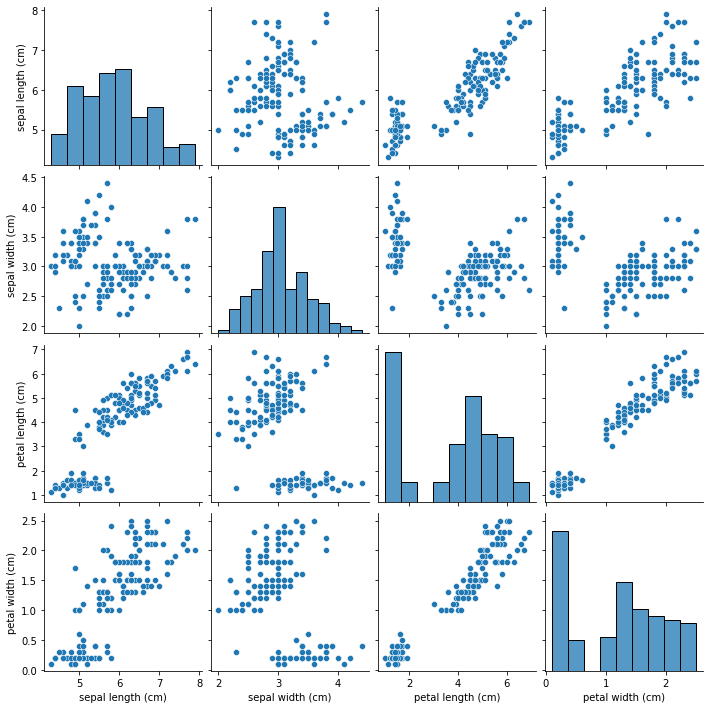

In [11]:
sns.pairplot(iris_df_cleaned);

# no skew in varuables, some correlation between the features 
# maybe we would want to consider removing highly correalated features?

In [12]:
# question: how would you group the data?

# one solution, using k-means clustering on the data
# fit on the cleaned iris df

n_clusters = 3 # for now, assign a random number of clusters

kmeans = KMeans(n_clusters=n_clusters, init = 'k-means++', random_state = 0).fit(iris_df_cleaned)

# resource: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# note: when working with distance based algorithms be sure to scale the data - but I did not do this for demo purposes

In [13]:
kmeans

KMeans(n_clusters=3, random_state=0)

In [14]:
y_kmeans = kmeans.labels_
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [15]:
Counter(y_kmeans)

Counter({0: 50, 1: 61, 2: 38})

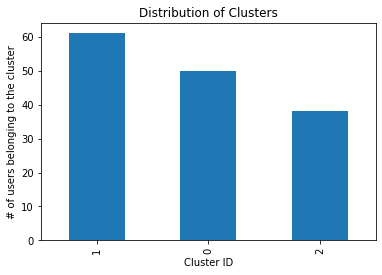

In [16]:
# Distribution of the clusters
# How many users were assigned to eaxh cluster

pd.DataFrame(Counter(y_kmeans).most_common()).set_index(0).plot.bar(legend=None)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('# of users belonging to the cluster');

In [17]:
print("The centroids for the clusters")

pd.DataFrame(kmeans.cluster_centers_, columns = iris_df_cleaned.columns)

# what does this dataframe show us?

The centroids for the clusters


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.006000,3.428000,1.462000,0.246000
1,5.903279,2.749180,4.381967,1.426230
2,6.850000,3.073684,5.742105,2.071053


In [18]:
# make predictions
# some sample data

x = [[1.2, 12, 12, 3], [5, 1, 2, 8.8]]

kmeans.predict(x)

array([2, 1], dtype=int32)

In [21]:
# definition to identify the optimal number of clusters

def optimal_number_clusters(df):
    """
    Calculates optimal number of clusted based on Elbow Method
    
    parameters df
    """
    
    Sum_of_squared_distances = []
    K = range(2, 20) # define the range of clusters we would like to cluster the data into

    for k in K:
        km = KMeans(n_clusters = k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)

    plt.figure(figsize=(20,10))

    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.xticks(K)
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show();

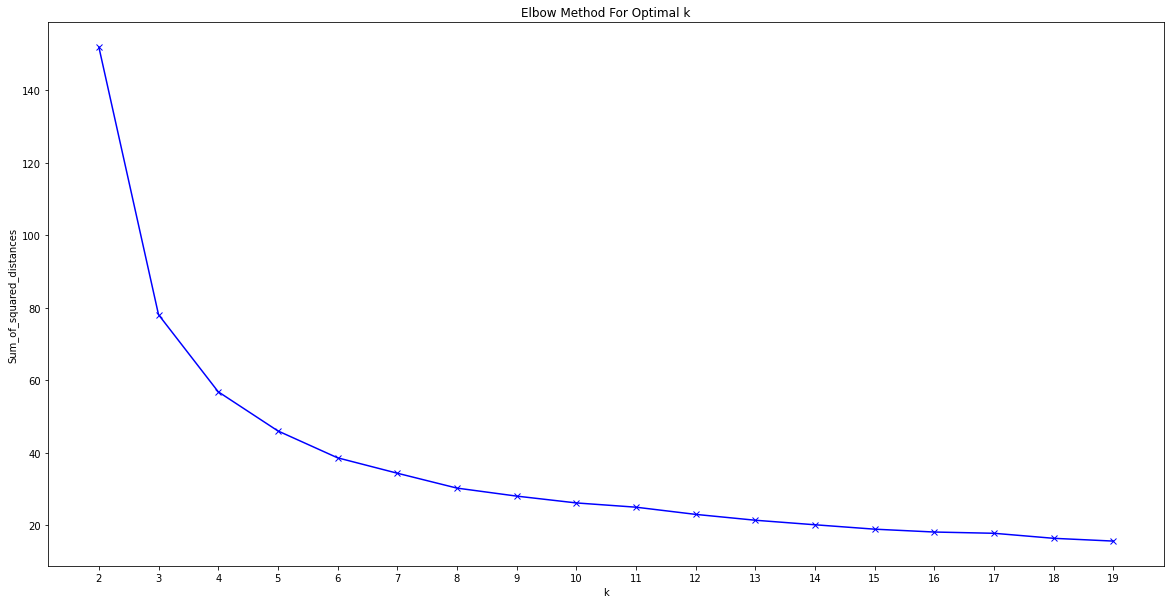

In [23]:
optimal_number_clusters(iris_df_cleaned)

In [24]:
# TO DO: Evaulate the clusters in more detail

y_kmeans_df = pd.DataFrame(y_kmeans).reset_index(drop = True)

iris_df_cleaned.insert(4, 'cluster', y_kmeans_df)
iris_df_cleaned

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:

iris_df_cleaned[iris_df_cleaned.cluster == 1].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
count,61.000000,61.000000,61.000000,61.00000,61.0
mean,5.903279,2.749180,4.381967,1.42623,1.0
std,0.470095,0.298676,0.504813,0.29377,0.0
min,4.900000,2.000000,3.000000,1.00000,1.0
25%,5.600000,2.500000,4.000000,1.30000,1.0
50%,5.900000,2.800000,4.500000,1.40000,1.0
75%,6.200000,3.000000,4.800000,1.50000,1.0
max,7.000000,3.400000,5.100000,2.40000,1.0


In [26]:
iris_df_cleaned[iris_df_cleaned.cluster == 0].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


In [27]:
iris_df_cleaned[iris_df_cleaned.cluster == 2].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
count,38.000000,38.000000,38.000000,38.000000,38.0
mean,6.850000,3.073684,5.742105,2.071053,2.0
std,0.494155,0.290092,0.488590,0.279872,0.0
min,6.100000,2.500000,4.900000,1.400000,2.0
25%,6.425000,2.925000,5.425000,1.825000,2.0
50%,6.700000,3.000000,5.650000,2.100000,2.0
75%,7.200000,3.200000,6.000000,2.300000,2.0
max,7.900000,3.800000,6.900000,2.500000,2.0


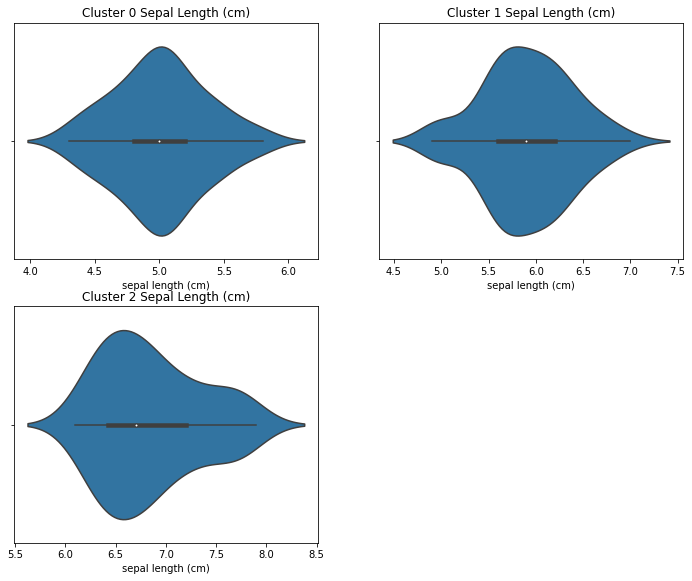

In [28]:
clusters = iris_df_cleaned["cluster"].unique() 

x = 1
plt.figure(figsize=(12, 20))
for x, c in enumerate(clusters):
    ax = plt.subplot(4, 2, x + 1)
    plt.title(f'Cluster {c} Sepal Length (cm)')
    sns.violinplot(x = iris_df_cleaned[iris_df_cleaned["cluster"] == c]["sepal length (cm)"]);


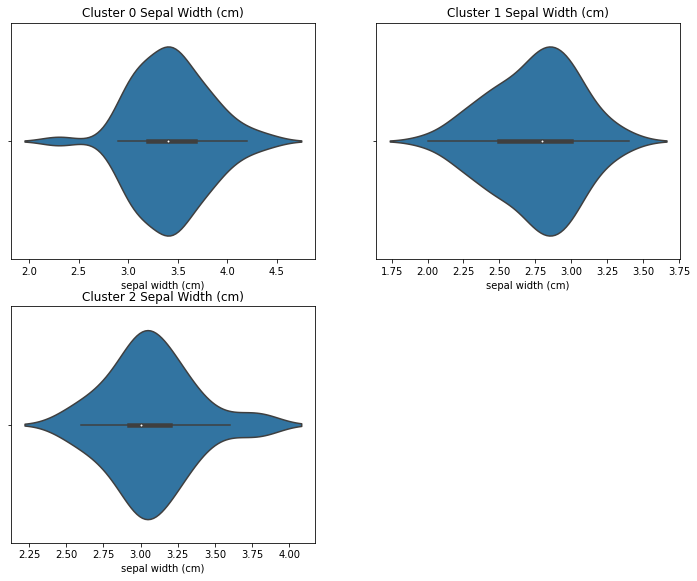

In [29]:
clusters = iris_df_cleaned["cluster"].unique() 

x = 1
plt.figure(figsize=(12, 20))
for x, c in enumerate(clusters):
    ax = plt.subplot(4, 2, x + 1)
    plt.title(f'Cluster {c} Sepal Width (cm)')
    sns.violinplot(x = iris_df_cleaned[iris_df_cleaned["cluster"] == c]["sepal width (cm)"]);

    
# TO DO: TIDY UP SUBSPOTS
# Question: Which cluster have the highest sepal width/length etc?

In [30]:
from sklearn.decomposition import PCA

def visualize_clusters(y_kmeans, data_scaled, n_clusters):
    """
    Visualize the users with predicted clusters.

    Run PCA on the transposed data and reduce the dimnensions in pca_num_components dimensions

    """

    reduced_data = PCA(n_components = 2).fit_transform(data_scaled)
    results = pd.DataFrame(reduced_data, columns = ['pca1','pca2'])
    results = pd.concat([results, pd.DataFrame(y_kmeans)], axis = 1).rename(columns={0 : "cluster"})

    cmap = sns.color_palette("Set1", n_colors = n_clusters, desat = .5)

    sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = results, palette = cmap, legend = True)
    plt.title('K-means Clustering with 2 dimensions')
    plt.show();

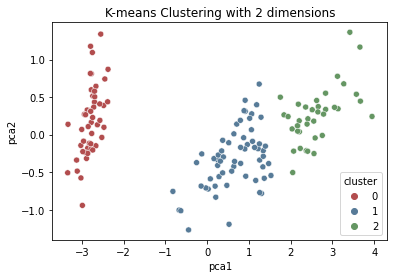

In [32]:
visualize_clusters(y_kmeans, iris_df_cleaned, n_clusters=3)